# Weather prediction example

This notebook shows a simple way to predict time series data using a PredictLite neural network

(c) Mikko Kursula 2022 - 2024. MIT License. 

In [1]:
# Enable automatic reloading (if changes are done in the model code)
%load_ext autoreload
%autoreload 2

# General
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Data source
import meteostat

# PredictLite
from predictlite.predictlite import PredictLite

### Get weather dataset

In [2]:
# Get hourly weather data
station_id = '02944'
start_dt = datetime(2017, 1, 1)
end_dt = datetime(2022, 1, 1)
dataset = meteostat.Hourly(station_id, start_dt, end_dt).fetch()
dataset.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2017-01-01 00:00:00,0.1,-3.1,79.0,NaN,NaN,230.0,13.0,NaN,996.5,NaN,NaN
2017-01-01 01:00:00,-0.5,-2.9,84.0,NaN,NaN,230.0,14.8,NaN,996.4,NaN,NaN
2017-01-01 02:00:00,0.0,-2.2,85.0,NaN,NaN,220.0,9.4,NaN,996.6,NaN,NaN
2017-01-01 03:00:00,-2.2,-3.6,90.0,NaN,NaN,230.0,13.0,NaN,996.6,NaN,NaN
2017-01-01 04:00:00,-3.2,-4.2,93.0,NaN,NaN,240.0,11.2,NaN,996.8,NaN,NaN


### Setup and train PredictLite model 

In [3]:
model = PredictLite(
    input_signals=['temp', 'rhum'], 
    input_length=72,
    output_signals=['temp', 'rhum'],
    output_length=24,
    data_sample_period=3600,
)

model.fit(dataset, train_sample_n=10000, test_sample_n=1000)

Setting up preprocessing
Building dataset
Training the model
epoch:   0, train loss: 1713.26861, test loss: 456.70616
epoch:   1, train loss: 245.95750, test loss: 179.41082
epoch:   2, train loss: 155.19133, test loss: 148.76732
epoch:   3, train loss: 140.39903, test loss: 135.34394
epoch:   4, train loss: 132.00504, test loss: 126.69921
epoch:   5, train loss: 125.40973, test loss: 120.10168
epoch:   6, train loss: 119.93821, test loss: 114.57454
epoch:   7, train loss: 115.04996, test loss: 109.71512
epoch:   8, train loss: 110.59401, test loss: 105.22833
epoch:   9, train loss: 106.91060, test loss: 101.34404
epoch:  10, train loss: 103.52410, test loss: 97.84505
epoch:  11, train loss: 100.46802, test loss: 94.92207
epoch:  12, train loss: 97.61981, test loss: 92.06625
epoch:  13, train loss: 95.22347, test loss: 89.77922
epoch:  14, train loss: 93.24395, test loss: 87.71503
epoch:  15, train loss: 91.45386, test loss: 85.82751
epoch:  16, train loss: 90.07623, test loss: 84.3047

In [4]:
model.model_summary()

Inputs:
	temp: 72
	rhum: 72
MLP:
	Linear(in_features=144, out_features=48, bias=True)
Outputs:
	temp: 24
	rhum: 24


### Make prediction

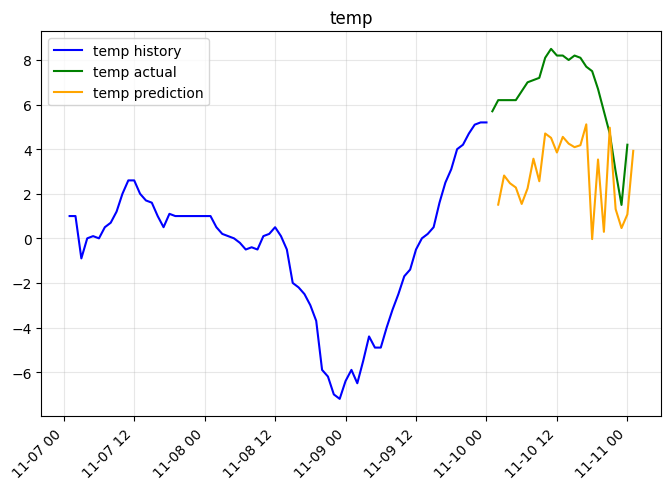

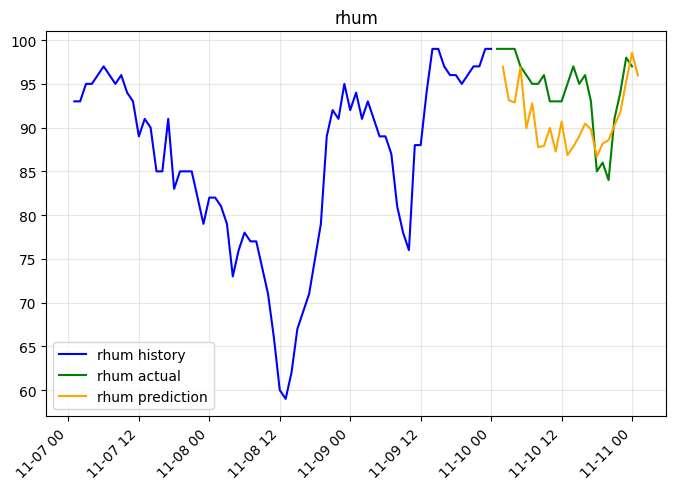

In [6]:
# Datetime for prediction start
prediction_time = datetime(2021, 11, 10, 1)

# Make prediction 
pred = model.predict(dataset, prediction_time)

# Plot data and prediction
pred_len = model.output_length
inp_len = model.input_length
for col in model.output_signals:
    
    ts_idx = dataset.index.get_indexer([prediction_time], method='pad')[0]
    plt.figure(figsize=(8, 5))
    plt.plot(
        dataset.index[ts_idx - inp_len : ts_idx].values, 
        dataset.iloc[ts_idx - inp_len : ts_idx][col].values, 
        color='blue', 
        label='{} history'.format(col)
    )
    plt.plot(
        dataset.index[ts_idx : ts_idx + pred_len].values, 
        dataset.iloc[ts_idx : ts_idx + pred_len][col].values, 
        color='green',
        label='{} actual'.format(col)
    )
    plt.plot(
        pred.index.values, 
        pred[col].values, 
        color='orange', 
        label='{} prediction'.format(col)
    )
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.title(col)
    plt.show()